In [72]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 File input and output
One of the most important tools in Python is the ability to read files from your computer and write new files or update existing files. I am going to go through a few simple examples of how to read and write data using Python.
## 1.1 Reading a file
Reading a file requires the opening of a file handle and then use of one of the several file read methods:
### 1.1.1 The read() method
This method will read the entire contents of the filehandle into a variable. You can limit the amount read by feeding the method a number as an argument. Consider the following example, which will read the first 11 bytes from the file:

In [73]:
edgar=open('company20194.idx','r')
print(edgar.read(1000))
edgar.close()

Description:           Master Index of EDGAR Dissemination Feed by Company Name
Last Data Received:    December 31, 2019
Comments:              webmaster@sec.gov
Anonymous FTP:         ftp://ftp.sec.gov/edgar/
 
 
 
 
Company Name                                                  Form Type   CIK         Date Filed  File Name
---------------------------------------------------------------------------------------------------------------------------------------------
024, Inc.                                                     D           1793747     2019-11-12  edgar/data/1793747/0001793747-19-000001.txt         
1 800 FLOWERS COM INC                                         10-Q        1084869     2019-11-08  edgar/data/1084869/0001437749-19-022111.txt         
1 800 FLOWERS COM INC                                         4           1084869     2019-11-01  edgar/data/1084869/0001437749-19-021279.txt         
1 800 FLOWERS COM INC                                         4           10848

### 1.1.2 The readline() method
You can read also read entire lines of the file using **readline()**. Each time the method is invoked, it will return a subsequent line from the file

In [74]:
edgar=open('company20194.idx','r')
print("Line 1: ", edgar.readline())
print("Line 2: ", edgar.readline())
print("Line 3: ", edgar.readline())
edgar.close()

Line 1:  Description:           Master Index of EDGAR Dissemination Feed by Company Name

Line 2:  Last Data Received:    December 31, 2019

Line 3:  Comments:              webmaster@sec.gov



### 1.1.3 The readlines() method
You can also read the lines of the file into a list such that each element of the list contains a different line.

In [79]:
edgar=open('company20194.idx','r')
x=edgar.readlines()
print(len(x))
for line in range(10):
    print(x[line])
edgar.close()

205966
Description:           Master Index of EDGAR Dissemination Feed by Company Name

Last Data Received:    December 31, 2019

Comments:              webmaster@sec.gov

Anonymous FTP:         ftp://ftp.sec.gov/edgar/

 

 

 

 

Company Name                                                  Form Type   CIK         Date Filed  File Name

---------------------------------------------------------------------------------------------------------------------------------------------



### 1.1.4 Reading lines with a for loop
You can also read lines one-by-one withe a **for** loop. Notice the **enumerate** function that is used in the loop declaration. This is a convenient way to create a line counter.

In [78]:
edgar=open('company20194.idx','r')
for (c, line) in enumerate(edgar,1):
    if c<11:
        print(line)
edgar.close()

Description:           Master Index of EDGAR Dissemination Feed by Company Name

Last Data Received:    December 31, 2019

Comments:              webmaster@sec.gov

Anonymous FTP:         ftp://ftp.sec.gov/edgar/

 

 

 

 

Company Name                                                  Form Type   CIK         Date Filed  File Name

---------------------------------------------------------------------------------------------------------------------------------------------



### 1.1.5 Using the with statement to avoid the need to close filehandles
When you open a filehandle, it needs to be closed. This can be somewhat annoying. A covenient workaround is the use of the **with** statement.

In [80]:
with open('company20194.idx','r') as edgar:
    for (c, line) in enumerate(edgar,1):
        if c<11:
            print(line)

Description:           Master Index of EDGAR Dissemination Feed by Company Name

Last Data Received:    December 31, 2019

Comments:              webmaster@sec.gov

Anonymous FTP:         ftp://ftp.sec.gov/edgar/

 

 

 

 

Company Name                                                  Form Type   CIK         Date Filed  File Name

---------------------------------------------------------------------------------------------------------------------------------------------



## 1.2 Writing to a file
Writing text to a file is very similar to reading a file. One difference is that when you open the filehandle for writing, you will need to specify either 'w' or 'a' instead of 'r' depending on whether you would like to overwrite an existing file or append to a file if it exists.

In [81]:
with open('output.txt', 'w') as fileout:
    fileout.write('This is how we write to a file.\n')
    
with open('output.txt', 'a') as f2:
    f2.write('Now we are appending another line to the file.\n')

32

47

# 2 Getting WRDS data with Python
Since the WRDS Cloud now houses its datasets in PostgreSQL format rather than a pile of .sas7bdat files, it is very convenient to pull some data from WRDS for either analysis or as part of some other task that you might have in mind. We will spend just a few minutes with the **wrds** module before moving into some more details about **pandas** and ways of looking at numerical data within Python. I encourage you to play around with Python and data analysis. See if you can use it for any tasks that might have been done in SAS or Stata. 

In [82]:
import wrds
db = wrds.Connection(wrds_username='sbonsall')


#The step below creates a file on your computer so that you do not 
#need to enter your password in the future when using the WRDS
#module. Quite convenient!

#db.create_pgpass_file()

Loading library list...
Done


In [83]:
# Listing the WRDS libraries
db.list_libraries()

['wrds_lib_internal',
 'ppubsamp_d4d_new',
 'ktmine',
 'revere',
 'levin',
 'lspd',
 'lspdsamp',
 'contrib_char_returns_new',
 'taq',
 'secsamp_all_new',
 'compd',
 'compgd',
 'preqsamp_all_new',
 'compbd',
 'compsegd',
 'crspa',
 'infogroup_business_academic',
 'ciq_ratings',
 'reprisk',
 'crspsamp',
 'optionm',
 'dmef',
 'doe',
 'taqmsamp',
 'rpnasamp',
 'secsamp',
 'snlsamp',
 'taqmsec',
 'sustsamp',
 'taqsamp',
 'risk_directors',
 'toyo',
 'trsdcgs',
 'trws',
 'twoiq',
 'wcai',
 'wqa',
 'wrdsapps',
 'wrdsrpts',
 'comscore',
 'comp_execucomp',
 'risk_governance',
 'wappsamp',
 'infogroup_business_academic_new',
 'govpxsmp',
 'hbsamp',
 'hfrsamp',
 'lvnsamp',
 'aha',
 'bank',
 'blab',
 'bvd',
 'compmcur',
 'ftsesamp',
 'ginsight',
 'gmi',
 'hbase',
 'ifgr',
 'ims',
 'cisdm',
 'issm',
 'nastraq',
 'pacap',
 'ppublica',
 'public',
 'rent',
 'snl',
 'sprat',
 'sustain',
 'sdcsamp',
 'centris',
 'emdb',
 'eureka',
 'evts',
 'govpx',
 'gsi',
 'block_all_new',
 'compdcur',
 'crsp_q_ziman',

In [85]:
# Listing the tables within a 
db.list_tables('rpna')

['rp_equities',
 'rp_global_macro',
 'pr_global_macro',
 'pr_equities',
 'web_equities',
 'web_global_macro',
 'rp_equities_2000',
 'rp_equities_2001',
 'rp_equities_2002',
 'rp_equities_2003',
 'rp_equities_2004',
 'rp_equities_2005',
 'rp_equities_2006',
 'rp_equities_2007',
 'rp_equities_2008',
 'rp_equities_2009',
 'rp_equities_2010',
 'rp_equities_2011',
 'rp_equities_2012',
 'rp_equities_2013',
 'rp_equities_2014',
 'rp_equities_2015',
 'rp_equities_2016',
 'rp_equities_2017',
 'rp_equities_2018',
 'rp_equities_2019',
 'rp_global_macro_2000',
 'rp_global_macro_2001',
 'rp_global_macro_2002',
 'rp_global_macro_2003',
 'rp_global_macro_2004',
 'rp_global_macro_2005',
 'rp_global_macro_2006',
 'rp_global_macro_2007',
 'rp_global_macro_2008',
 'rp_global_macro_2009',
 'rp_global_macro_2010',
 'rp_global_macro_2011',
 'rp_global_macro_2012',
 'rp_global_macro_2013',
 'rp_global_macro_2014',
 'rp_global_macro_2015',
 'rp_global_macro_2016',
 'rp_global_macro_2017',
 'rp_global_macro_20

In [86]:
# You can also describe the contents of a table

db.describe_table(library='comp', table='adsprate')

Approximately 3023650 rows in comp.adsprate.


,name,nullable,type
0,gvkey,True,VARCHAR(6)
1,splticrm,True,VARCHAR(10)
2,spsdrm,True,VARCHAR(10)
3,spsticrm,True,VARCHAR(10)
4,datadate,True,DATE


In [87]:
#There are two ways of querying data from WRDS. 
#The first is get_table and the second is raw_sql.

## get_table

ratings=db.get_table(library='comp',table='adsprate', columns=['gvkey','datadate','splticrm'])



In [88]:
ratings[ratings['gvkey']=='001690']

,gvkey,datadate,splticrm
57079,001690,1986-10-31,None
57080,001690,1986-11-30,None
57081,001690,1986-12-31,None
57082,001690,1987-01-31,None
57083,001690,1987-02-28,None
...,...,...,...
57439,001690,2016-10-31,AA+
57440,001690,2016-11-30,AA+
57441,001690,2016-12-31,AA+
57442,001690,2017-01-31,AA+


In [90]:
## raw_sql

prices=db.raw_sql("select permno, date, ret from crsp.dsf where date_part('year',date)=2019 limit 100")
prices

,permno,date,ret
0,87487.0,2019-01-02,0.030948
1,87487.0,2019-01-03,-0.011257
2,87487.0,2019-01-04,0.068311
3,87487.0,2019-01-07,0.012433
4,87487.0,2019-01-08,0.047368
...,...,...,...
95,87487.0,2019-05-20,-0.006356
96,87487.0,2019-05-21,0.012793
97,87487.0,2019-05-22,-0.023158
98,87487.0,2019-05-23,0.032328


In [91]:
prices2=db.raw_sql("select permno, date, ret from crsp.dsf where date_part('year',date)=2019")  
db.close()

# 3 Working with tabular data: The Pandas package
Text analysis typically involves unstructured and structured data. Un- structured data is data that is not organized in a pre-defined manner, such as a 10-K or an image. A 10-K is unstructured since each company organizes its 10-K differently. Much of this paper deals with unstruc- tured text data. However, researchers performing text analysis will also work with structured data such as SAS and Stata datasets, Excel files, and CSV files corresponding to Compustat, IBES, and CRSP data. Structured data is organized into pre-defined columns, each of which contains a specific type of data, and rows, each of which contains an observation.
## 3.1 Required import statements
The most common method of importing the Pandas library is with this call to the **import** statement. It is common practice to use the alias pd for Pandas, and we recommend the reader to do the same.

In [ ]:
import pandas as pd

The Pandas library is built on top of a numerical analysis library called NumPy, and most Pandas users frequently call NumPy functions to manipulate data. Therefore, most users include the following import statements at the top of their notebooks. We recommend the reader to do the same.

In [ ]:
import numpy as np

## 3.2 Importing and exporting data
In this section, we introduce Pandas’ capabilities for importing data from Excel, CSV, Stata, and SAS formats. We provide sample code and explanation for common use cases. Pandas provides powerful and flexible import capabilities and supports many other data formats. Consult the [official documentation](https://pandas.pydata.org/docs/user_guide/io.html) for use cases not covered here.

All Pandas functions for importing data begin with **read_**, e.g. **pd.read_excel**, **pd.read_sas**, etc. The options for these functions are fairly standardized so the learning curve flattens after the user gains proficiency with one import function.
### 3.2.1 Importing data from Excel
Use the function **pd.read_excel** to import data from an Excel file. If the Excel file contains only one worksheet with well-formatted data (i.e., one contiguous block of data with header row and no blank lines at the top of the worksheet) then **pd.read_excel** requires only one argument, the path to the file.

In [92]:
import numpy as np
import pandas as pd

df=pd.read_excel('Categorical_EPU_Data.xlsx')

Notice that the pd.read_excel function assumed that the first row contained column names and automatically used them as column labels in the DataFrame. You can preview the DataFram by typing its name (**df**) into a code cell.

In [93]:
df

,Date,1. Economic Policy Uncertainty,2. Monetary policy,Fiscal Policy (Taxes OR Spending),3. Taxes,4. Government spending,5. Health care,6. National security,7. Entitlement programs,8. Regulation,Financial Regulation,9. Trade policy,"10. Sovereign debt, currency crises"
0,1985-01-01,213.678835,270.469228,292.614556,295.790786,394.099747,107.848241,179.699854,258.346221,129.632820,113.247177,88.182852,0.000000
1,1985-02-01,155.426022,219.835677,164.235536,139.125596,225.032780,36.733030,124.859498,82.492997,55.191052,0.000000,45.052521,129.210224
2,1985-03-01,121.137375,119.034522,108.828815,115.714342,102.026340,31.642944,63.269264,113.699141,85.577836,149.521522,77.619208,111.305596
3,1985-04-01,104.982353,122.044760,104.737331,85.760217,138.080529,38.066636,85.627432,51.292760,60.054521,44.968804,0.000000,0.000000
4,1985-05-01,115.736778,107.573580,134.839967,132.177769,167.568909,54.705931,109.383122,98.284429,65.756140,129.250207,67.096018,96.215388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,2018-03-01,70.949700,27.382046,80.343315,90.853825,34.977241,65.432448,95.712855,42.536581,84.858496,62.379657,342.126663,24.227560
399,2018-04-01,84.527300,30.688176,96.291803,107.118919,34.141700,103.495758,132.415849,91.895209,110.558840,101.766720,279.552742,44.191207
400,2018-05-01,84.422401,29.949787,91.738551,100.697529,22.147036,117.341815,102.661424,111.835199,105.267006,67.618538,197.975014,42.282276
401,2018-06-01,100.570703,29.374332,112.038643,118.412623,46.773636,99.891954,156.477491,48.867181,92.919965,57.123037,318.385555,93.998359


One word of caution: attempting to use **pd.read_excel** on a file that is open in Excel will throw an error. To be able to read the file in Pandas, we need to close the file in Excel and try again.
#### Using pd.read_excel with an Excel Workbook Containing Multiple Worksheets
Excel workbooks often contain multiple worksheets. By default, the function **pd.read_excel** will read data from the first worksheet in the workbook. To read a different worksheet, use the optional keyword argument sheet_name. This argument accepts the following values:
- A case-sensitive string containing the name of the worksheet.
- A zero-based integer index of the worksheet. 0 means the first
worksheet, 1 means the second worksheet, and so on.

#### Using pd.read_excel When the Header Row is Missing
By default, **read_excel** assumes that the first row of data contains column **names**. If these column names are missing, pass the keyword argument **header=None**. Provide column names by passing a list to the optional keyword argument names.
#### Skipping Rows and Blank Lines
Many Excel users place blank lines and text above the data in a worksheet. To handle this use case, use the optional keyword argument skiprows when calling **pd.read_excel**. To skip the first n lines of the file, use **skiprows=n**. Alternatively, to skip specific rows, pass a list of row numbers; unlike Excel, skiprows assumes row numbers begin at zero.

In [94]:
df2=pd.read_excel('Categorical_EPU_Data.xlsx', header=None, skiprows=1, names=['date','epu','monetary_policy','fiscal_policy','taxes','gov_spending','health_care','national_security','entitlement_programs','regulation','financial_regulation','trade_policy','sov_debt_curr_crises'])
df2.head()

,date,epu,monetary_policy,fiscal_policy,taxes,gov_spending,health_care,national_security,entitlement_programs,regulation,financial_regulation,trade_policy,sov_debt_curr_crises
0,1985-01-01,213.678835,270.469228,292.614556,295.790786,394.099747,107.848241,179.699854,258.346221,129.632820,113.247177,88.182852,0.000000
1,1985-02-01,155.426022,219.835677,164.235536,139.125596,225.032780,36.733030,124.859498,82.492997,55.191052,0.000000,45.052521,129.210224
2,1985-03-01,121.137375,119.034522,108.828815,115.714342,102.026340,31.642944,63.269264,113.699141,85.577836,149.521522,77.619208,111.305596
3,1985-04-01,104.982353,122.044760,104.737331,85.760217,138.080529,38.066636,85.627432,51.292760,60.054521,44.968804,0.000000,0.000000
4,1985-05-01,115.736778,107.573580,134.839967,132.177769,167.568909,54.705931,109.383122,98.284429,65.756140,129.250207,67.096018,96.215388


#### Getting Help for pd.read_excel
The official documentation page for pd.read_excel is located here. Alternatively, type **help(pd.read_excel)** into a Jupyter notebook cell and execute the cell.
### 3.2.2 Importing data from a CSV file
CSV stands for “comma separated value.” A CSV file is a text file that uses commas to separate, or delimit, values. CSV format is commonly used to store small-to-medium sized data files because it can be used to transfer data between different software (e.g., SAS and Stata), and because all major operating systems support it.

By convention, the first row of a CSV file contains the column names. The Pandas function **pd.read_csv** is similar to **pd.read_excel**. The two functions accept many of the same arguments, such as **skiprows** and **names**. However, since CSV files are a text files. Some issues commonly arise when importing financial data in CSV format. In the remainder of this section, we demonstrate how to handle two of these issues: parsing date columns.

In [95]:
import numpy as np
import pandas as pd

df3=pd.read_csv('EarningsNews.csv')
df3.head()

,RP_ENTITY_ID,ISIN,date,firm,press,permno,gvkey
0,164D72,AN8068571086,18JAN2001,2.0,1.0,14277,9465
1,164D72,AN8068571086,22JUL2003,1.0,1.0,14277,9465
2,164D72,AN8068571086,17JUL2002,3.0,NaN,14277,9465
3,164D72,AN8068571086,10MAR2006,NaN,1.0,14277,9465
4,164D72,AN8068571086,24JUL2009,4.0,2.0,14277,9465


In [96]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299733 entries, 0 to 299732
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   RP_ENTITY_ID  299733 non-null  object 
 1   ISIN          299733 non-null  object 
 2   date          299733 non-null  object 
 3   firm          278710 non-null  float64
 4   press         109990 non-null  float64
 5   permno        299733 non-null  int64  
 6   gvkey         299733 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 16.0+ MB


#### Parsing Dates
The **pd.read_csv** function can parse dates. Simply tell the function which columns contain dates through the parse_dates keyword ar- gument, and Pandas usually imports the dates correctly.

To import the *date* field from our CSV file, we can use the following modification to our code:

In [97]:
df4=pd.read_csv('EarningsNews.csv', parse_dates=['date'], dayfirst=True)
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299733 entries, 0 to 299732
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   RP_ENTITY_ID  299733 non-null  object        
 1   ISIN          299733 non-null  object        
 2   date          299733 non-null  datetime64[ns]
 3   firm          278710 non-null  float64       
 4   press         109990 non-null  float64       
 5   permno        299733 non-null  int64         
 6   gvkey         299733 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 16.0+ MB


,RP_ENTITY_ID,ISIN,date,firm,press,permno,gvkey
0,164D72,AN8068571086,2001-01-18,2.0,1.0,14277,9465
1,164D72,AN8068571086,2003-07-22,1.0,1.0,14277,9465
2,164D72,AN8068571086,2002-07-17,3.0,NaN,14277,9465
3,164D72,AN8068571086,2006-03-10,NaN,1.0,14277,9465
4,164D72,AN8068571086,2009-07-24,4.0,2.0,14277,9465


#### Getting Help for pd.read_csv
The official documentation page for **pd.read_csv** is located [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Alternatively, type **help(pd.read_csv)** into a Jupyter notebook cell and execute the cell.
### 3.2.3 Importing Data from Stata
Use the function **pd.read_stata** to read Stata .dta files. At the time of this writing, **pd.read_stata** supports Stata versions 10–14. If your Stata file was written by a later version of Stata, either save it to an earlier version or save it to Excel or CSV.
### 3.2.4 Importing Data from SAS
Use the function **pd.read_sas** to read SAS files. This function can read SAS xport (.XPT) files and SAS7BDAT files. In our experience, this function can be finicky. If you have a valid SAS license and SAS installation on your computer and plan to regularly pass data between SAS and Python, we highly recommend the package **SASPy**. This package was written by The SAS Institute and is officially supported.
### 3.2.5 Exporting Data
Every **read_** function discussed in this paper has a corresponding **write_** function. It is therefore straightforward to save data to a desired format.
## 3.3 Viewing Data in Pandas
Researchers working with Pandas in Jupyter Notebooks have several options for viewing data. To view an entire DataFrame (or Series), simply type the name of the variable into a cell and run the cell. The data will be shown underneath the cell. If the DataFrame has many rows, Jupyter will show the top and bottom rows. Pandas users typically only need to view a few rows at a time. This is accomplished using the head and tail commands. For example, if the variable df stores a DataFrame, **df.head()** will display the first 5 rows of that DataFrame, and **df.tail()** will display the last 5 rows. To specify the number of rows to display, pass an optional argument to head or tail. Thus, **df.head(3)** will display the first 3 rows of *df*.

Use DataFrame’s sample method to view randomly selected rows. **df.sample()** will display one randomly chosen row and **df.sample(n)** will display n randomly chosen rows.
## 3.4 Selecting and Filtering Data

This chapter demonstrates the basics of selecting and filtering data in Pandas DataFrames. By selecting, we mean choosing a subset (usually columns) of a DataFrame. By filtering, we mean choosing a subset of rows with values that meet certain criteria. Pandas provides many features for selecting and filtering data and there are often multiple ways to do the same thing. We will only scratch the surface of Pandas’ capabilities.
### 3.4.1 Selecting Columns of a DataFrame
To select a subset of columns, you can call the frame with a list argument inside square brackets:

In [98]:
ratings.head()
ratings[['gvkey','datadate']]

,gvkey,datadate,splticrm
0,001003,2004-06-30,None
1,001003,2004-07-31,None
2,001003,2004-08-31,None
3,001003,2004-09-30,None
4,001003,2004-10-31,None


,gvkey,datadate
0,001003,2004-06-30
1,001003,2004-07-31
2,001003,2004-08-31
3,001003,2004-09-30
4,001003,2004-10-31
...,...,...
3023647,316056,2016-10-31
3023648,316056,2016-11-30
3023649,316056,2016-12-31
3023650,316056,2017-01-31


### 3.4.2 Filtering a DataFrame
Filtering is the process of extracting rows of a dataset that meet certain criteria. The main idea behind filtering in Pandas is to pass a Boolean series to a DataFrame; only rows for which the Boolean Series is true are kept in the filtered DataFrame.

In [99]:
ratings['datadate']=pd.to_datetime(ratings['datadate'],format='%Y-%m-%d')
ratings_00s=ratings[(ratings['datadate'].dt.year>=2000) & (ratings['datadate'].dt.year<=2009)].copy()
ratings_00s.sort_values('datadate')

,gvkey,datadate,splticrm
1167305,014947,2000-01-31,None
2178158,065348,2000-01-31,None
315652,004783,2000-01-31,None
784717,010301,2000-01-31,BBB
1295753,017678,2000-01-31,None
...,...,...,...
2396894,116826,2009-12-31,None
409103,005899,2009-12-31,None
2396667,116791,2009-12-31,None
2330291,108823,2009-12-31,None


## 3.5 Creating new columns
Each column of a DataFrame is a Series. Therefore, creating a new column implies creating a Series. Typically, new columns are created as transformations of existing columns. However, sometimes new columns contain single values.
### 3.5.1 Creating a column from a scalar value
Pandas makes it very easy to create a new column that contains a single, repeated value. Simply assign that value to a column of the DataFrame that does not already exist.

In [100]:
ratings['newcol']=1
ratings

,gvkey,datadate,splticrm,newcol
0,001003,2004-06-30,None,1
1,001003,2004-07-31,None,1
2,001003,2004-08-31,None,1
3,001003,2004-09-30,None,1
4,001003,2004-10-31,None,1
...,...,...,...,...
3023647,316056,2016-10-31,BBB-,1
3023648,316056,2016-11-30,BBB-,1
3023649,316056,2016-12-31,BBB-,1
3023650,316056,2017-01-31,BBB-,1


This code tells Pandas to first create a DataFrame containing a single column. The second line of code references a column named 'newcol' in DataFrame *ratings*. Since that column does not exist, Pandas will create it. When Pandas sees a single, scalar value assigned to a Series, it automatically adds that value to every row of the DataFrame.

To summarize, to create a new column in a DataFrame containing
a single, repeated value:

- Type the DataFrame name followed by square brackets.

- Inside the square brackets, type the name of the new column as a string.

- After the brackets, type an equals sign and then the desired value.

### 3.5.2 Creating a column as a transformation of an existing column
Column transformations are very common. Examples of column trans- formation are to (1) strip whitespace from all values in a column, (2) convert a string column to uppercase, and (3) perform a mathematical operation on every value in a column. In this section, we provide sample code that implements these examples. Often, when cleaning data like this, it is desirable to do so “in place” (i.e., instead of creating a new column, replace data in an existing column with transformed data).

We will extract the year from 'datadate' in the *ratings* DataFrame and add it to the DataFrame:

In [101]:
ratings['year']=ratings['datadate'].dt.year
ratings

,gvkey,datadate,splticrm,newcol,year
0,001003,2004-06-30,None,1,2004
1,001003,2004-07-31,None,1,2004
2,001003,2004-08-31,None,1,2004
3,001003,2004-09-30,None,1,2004
4,001003,2004-10-31,None,1,2004
...,...,...,...,...,...
3023647,316056,2016-10-31,BBB-,1,2016
3023648,316056,2016-11-30,BBB-,1,2016
3023649,316056,2016-12-31,BBB-,1,2016
3023650,316056,2017-01-31,BBB-,1,2017


## 3.6 Dropping and renaming columns
### 3.6.1 Dropping columns
Use the aptly named drop method to drop columns from a Pandas DataFrame. Pass a list of unwanted column names to the columns keyword argument. For example, if we wanted to drop the 'newcol' column from the *ratings* DataFrame, we could do the following:

In [102]:
ratings.drop(columns=['newcol'], inplace=True)
ratings

,gvkey,datadate,splticrm,year
0,001003,2004-06-30,None,2004
1,001003,2004-07-31,None,2004
2,001003,2004-08-31,None,2004
3,001003,2004-09-30,None,2004
4,001003,2004-10-31,None,2004
...,...,...,...,...
3023647,316056,2016-10-31,BBB-,2016
3023648,316056,2016-11-30,BBB-,2016
3023649,316056,2016-12-31,BBB-,2016
3023650,316056,2017-01-31,BBB-,2017


Notice the keyword argument inplace. By default, the drop method returns a new DataFrame. To force drop to operate in place, this argument is needed. An alternative method for dropping columns in place is to reassign the result to the existing DataFrame. For example:

In [104]:
ratings2=ratings.drop(columns=['year'])
ratings2
ratings

,gvkey,datadate,splticrm
0,001003,2004-06-30,None
1,001003,2004-07-31,None
2,001003,2004-08-31,None
3,001003,2004-09-30,None
4,001003,2004-10-31,None
...,...,...,...
3023647,316056,2016-10-31,BBB-
3023648,316056,2016-11-30,BBB-
3023649,316056,2016-12-31,BBB-
3023650,316056,2017-01-31,BBB-


,gvkey,datadate,splticrm,year
0,001003,2004-06-30,None,2004
1,001003,2004-07-31,None,2004
2,001003,2004-08-31,None,2004
3,001003,2004-09-30,None,2004
4,001003,2004-10-31,None,2004
...,...,...,...,...
3023647,316056,2016-10-31,BBB-,2016
3023648,316056,2016-11-30,BBB-,2016
3023649,316056,2016-12-31,BBB-,2016
3023650,316056,2017-01-31,BBB-,2017


### 3.6.2 Renaming columns
The **rename** method works similarly to the **drop** method demonstrated above. However, instead of passing a list to the **columns** keyword argument, rename requires a *dictionary*. Each key in the dictionary must be the name of an existing column; the corresponding value is the new name for that column. This should be clear from the following example.

We will change the names of the 'datadate' and 'splticrm' variables in the ratings DataFrame:

In [105]:
ratings.rename(columns={'datadate':'rating_date','splticrm':'rating'}, inplace=True)
ratings

,gvkey,rating_date,rating,year
0,001003,2004-06-30,None,2004
1,001003,2004-07-31,None,2004
2,001003,2004-08-31,None,2004
3,001003,2004-09-30,None,2004
4,001003,2004-10-31,None,2004
...,...,...,...,...
3023647,316056,2016-10-31,BBB-,2016
3023648,316056,2016-11-30,BBB-,2016
3023649,316056,2016-12-31,BBB-,2016
3023650,316056,2017-01-31,BBB-,2017


## 3.7 Sorting data
To sort data in a DataFrm, use the **sort_values** method. Use the following keyword arguments to achieve the desired result:

- **by**: pass a list of column names by which to sort

- **ascending**: Use **True** (**False**) to sort all columns in ascending (descending) order. Alternatively, pass a list of Booleans to specify the sort order for each column named in the by argument.

- **inplace**: Use **True** to sort in-place. If this argument is omitted or set to **False**, then **sort_values** will return a new, sorted DataFrame.

Let's sort the *ratings* DataFrame by year and rating.

In [106]:
sorted_ratings=ratings.sort_values(by=['year','rating'], ascending=[True,False])
sorted_ratings[(sorted_ratings['year']==2000) & (sorted_ratings['rating'].notna())]

,gvkey,rating_date,rating,year
1722827,028888,2000-01-31,SD,2000
1722828,028888,2000-02-29,SD,2000
1722829,028888,2000-03-31,SD,2000
1722830,028888,2000-04-30,SD,2000
1722831,028888,2000-05-31,SD,2000
...,...,...,...,...
3001373,220940,2000-10-31,A,2000
3001374,220940,2000-11-30,A,2000
3001375,220940,2000-12-31,A,2000
3006133,224817,2000-11-30,A,2000


## 3.8 Summarizing data
You can easily use the Pandas package to get summary statistics for your data. Summary statistics can be applied using various methods and can be applied to groups of variables. For instance, we can collapse the EPU data that we imported earlier to the annual level.

In [107]:
df2['year']=df2['date'].dt.year
df2
## Only retain 'EPU'
annual_epu=df2.groupby('year')['epu'].mean()
annual_epu

## Retain all variables at the annual level
annual=df2.groupby('year').mean()
annual

,date,epu,monetary_policy,fiscal_policy,taxes,gov_spending,health_care,national_security,entitlement_programs,regulation,financial_regulation,trade_policy,sov_debt_curr_crises,year
0,1985-01-01,213.678835,270.469228,292.614556,295.790786,394.099747,107.848241,179.699854,258.346221,129.632820,113.247177,88.182852,0.000000,1985
1,1985-02-01,155.426022,219.835677,164.235536,139.125596,225.032780,36.733030,124.859498,82.492997,55.191052,0.000000,45.052521,129.210224,1985
2,1985-03-01,121.137375,119.034522,108.828815,115.714342,102.026340,31.642944,63.269264,113.699141,85.577836,149.521522,77.619208,111.305596,1985
3,1985-04-01,104.982353,122.044760,104.737331,85.760217,138.080529,38.066636,85.627432,51.292760,60.054521,44.968804,0.000000,0.000000,1985
4,1985-05-01,115.736778,107.573580,134.839967,132.177769,167.568909,54.705931,109.383122,98.284429,65.756140,129.250207,67.096018,96.215388,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,2018-03-01,70.949700,27.382046,80.343315,90.853825,34.977241,65.432448,95.712855,42.536581,84.858496,62.379657,342.126663,24.227560,2018
399,2018-04-01,84.527300,30.688176,96.291803,107.118919,34.141700,103.495758,132.415849,91.895209,110.558840,101.766720,279.552742,44.191207,2018
400,2018-05-01,84.422401,29.949787,91.738551,100.697529,22.147036,117.341815,102.661424,111.835199,105.267006,67.618538,197.975014,42.282276,2018
401,2018-06-01,100.570703,29.374332,112.038643,118.412623,46.773636,99.891954,156.477491,48.867181,92.919965,57.123037,318.385555,93.998359,2018


year
1985    126.191508
1986    128.878619
1987    112.466545
1988    103.178799
1989     87.786837
1990    132.537502
1991    135.245365
1992    137.698789
1993    117.951010
1994     91.609789
1995     88.094065
1996     74.291739
1997     65.517280
1998     90.064893
1999     59.311176
2000     71.730036
2001    129.112825
2002    111.425528
2003    114.130102
2004     71.183726
2005     59.735664
2006     56.062118
2007     58.549745
2008    124.360158
2009    118.635289
2010    134.250892
2011    132.762859
2012    134.025010
2013    108.351731
2014     64.768412
2015     64.988918
2016     77.750079
2017     92.594753
2018     88.995013
Name: epu, dtype: float64

,epu,monetary_policy,fiscal_policy,taxes,gov_spending,health_care,national_security,entitlement_programs,regulation,financial_regulation,trade_policy,sov_debt_curr_crises
year,,,,,,,,,,,,
1985,126.191508,137.195482,141.111016,131.740702,181.966016,37.587383,112.272421,96.017917,76.219819,60.485116,68.595956,95.019768
1986,128.878619,128.437649,156.533631,151.850726,187.936036,53.255540,111.394843,60.815620,102.508627,96.688842,92.759661,96.220849
1987,112.466545,129.799471,118.039189,100.283102,177.730991,48.055401,97.020168,70.063269,103.220243,159.557261,95.685350,131.219446
1988,103.178799,107.505636,99.872102,89.998131,129.300827,58.055240,88.010151,62.321515,88.561240,94.678232,103.590925,117.640820
1989,87.786837,79.191911,72.521176,67.116664,80.988643,39.929499,88.777918,46.268189,90.768883,113.246425,79.869901,67.724564
1990,132.537502,113.218285,129.411066,111.488883,180.471488,69.436001,175.806815,76.855311,134.555526,173.286566,128.238024,67.751414
1991,135.245365,138.273711,118.009239,114.774158,131.037045,108.001126,203.767793,119.979031,135.842623,209.996253,92.689565,25.490750
1992,137.698789,125.138739,141.435030,137.858078,153.446085,136.965037,143.720635,104.080275,118.494080,83.073189,201.641538,210.311074
1993,117.951010,84.128190,128.261884,132.943570,117.987301,201.301687,102.374561,135.306245,132.674589,46.048860,407.887560,101.863643


## 3.9 Merging data
Just like in Stata, SAS, and SQL, the Pandas module in Python can merge different DataFrames and Series together in a database-style approach.

Let's try to merge the credit rating data with a few variables from the Compustat annual file.

In [108]:
db=wrds.Connection(wrds_username='sbonsall')

comp=db.raw_sql("select gvkey, datadate, at from comp.funda where date_part('year',datadate) between 2000 and 2010 and indfmt='INDL' and consol='C' and datafmt='STD'")

db.close()

Loading library list...
Done


In [109]:
comp['datadate']=pd.to_datetime(comp['datadate'],format='%Y-%m-%d')
comp.info()
ratings.info()
merged=pd.merge(comp,ratings, left_on=['gvkey','datadate'], right_on=['gvkey','rating_date'],indicator=True, validate='1:1')
merged

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122301 entries, 0 to 122300
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   gvkey     122301 non-null  object        
 1   datadate  122301 non-null  datetime64[ns]
 2   at        107018 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023652 entries, 0 to 3023651
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   gvkey        object        
 1   rating_date  datetime64[ns]
 2   rating       object        
 3   year         int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 92.3+ MB


,gvkey,datadate,at,rating_date,rating,year,_merge
0,001004,2002-05-31,710.199,2002-05-31,BBB-,2002,both
1,001004,2000-05-31,740.998,2000-05-31,BBB,2000,both
2,001004,2001-05-31,701.854,2001-05-31,BBB,2001,both
3,001004,2003-05-31,686.621,2003-05-31,BB-,2003,both
4,001004,2008-05-31,1362.010,2008-05-31,BB,2008,both
...,...,...,...,...,...,...,...
97835,287882,2009-12-31,27379.730,2009-12-31,BB+,2009,both
97836,287882,2010-12-31,35258.049,2010-12-31,BB+,2010,both
97837,291721,2008-12-31,104.344,2008-12-31,None,2008,both
97838,291721,2009-12-31,90.254,2009-12-31,None,2009,both


## 3.10 Visualization
You can do a lot with graphs in Pandas and Python. The main module for plotting is called **matplotlib**. We will load that and then see how to graph. Obviously, you will have to play around with plotting for a while to a hang of all the available features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 403 non-null    datetime64[ns]
 1   1. Economic Policy Uncertainty       403 non-null    float64       
 2   2. Monetary policy                   403 non-null    float64       
 3   Fiscal Policy (Taxes OR Spending)    403 non-null    float64       
 4   3. Taxes                             403 non-null    float64       
 5   4. Government spending               403 non-null    float64       
 6   5. Health care                       403 non-null    float64       
 7   6. National security                 403 non-null    float64       
 8   7. Entitlement programs              403 non-null    float64       
 9   8. Regulation                        403 non-null    float64       
 10  Financial Regu

Text(0, 0.5, 'Index Level')

Text(0.5, 1.0, 'Policy Uncertainty Over Time')

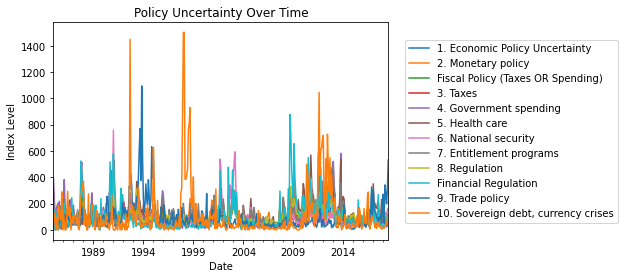

In [110]:
import matplotlib.pyplot as plt
df.info()
df.plot(x='Date')
plt.ylabel('Index Level')
plt.legend(loc='right', bbox_to_anchor=(1.7, 0.5))
plt.title('Policy Uncertainty Over Time')
plt.savefig('epu.png',dpi=400, bbox_inches='tight')